In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from datetime import datetime
from scipy import stats


# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

cur_date = datetime.today().strftime ('%m/%d/%Y')

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [7]:


for value in cities:
    print(f"Processing Record {cities.index(value)} of Set 1 | {value}.")
    

Processing Record 0 of Set 1 | barrow.
Processing Record 1 of Set 1 | kulaman.
Processing Record 2 of Set 1 | albany.
Processing Record 3 of Set 1 | new norfolk.
Processing Record 4 of Set 1 | verkhnyaya inta.
Processing Record 5 of Set 1 | beirut.
Processing Record 6 of Set 1 | sentyabrskiy.
Processing Record 7 of Set 1 | coihaique.
Processing Record 8 of Set 1 | bluff.
Processing Record 9 of Set 1 | mahebourg.
Processing Record 10 of Set 1 | carnarvon.
Processing Record 11 of Set 1 | hobart.
Processing Record 12 of Set 1 | port elizabeth.
Processing Record 13 of Set 1 | puerto ayora.
Processing Record 14 of Set 1 | kingman.
Processing Record 15 of Set 1 | taolanaro.
Processing Record 16 of Set 1 | hithadhoo.
Processing Record 17 of Set 1 | ushuaia.
Processing Record 18 of Set 1 | middelburg.
Processing Record 19 of Set 1 | zhigansk.
Processing Record 20 of Set 1 | cape town.
Processing Record 21 of Set 1 | illoqqortoormiut.
Processing Record 22 of Set 1 | mys shmidta.
Processing Reco

In [8]:
# set up lists to hold reponse info

lat = []
lng = []
temp = []
humidity = []
cloud = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for area in cities:
    
    try:
        
        response = requests.get(query_url + area).json()

        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response["sys"]["country"])
        date.append(cur_date)
    
        print(f"{area} {lat} {lng} {temp} {humidity} {wind_speed} {country}")
    
    except KeyError:
    
        print(f"{area}, doesn't have information.")
        lat.append(None)
        lng.append(None)
        temp.append(None)
        humidity.append(None)
        cloud.append(None)
        wind_speed.append(None)
        country.append(None)
        date.append(None)
    
    

barrow [71.29] [-156.79] [33.8] [96] [14.99] ['US']
kulaman [71.29, 6.46] [-156.79, 124.09] [33.8, 78.49] [96, 70] [14.99, 3.33] ['US', 'PH']
albany [71.29, 6.46, 42.6] [-156.79, 124.09, -73.97] [33.8, 78.49, 70] [96, 70, 77] [14.99, 3.33, 6.31] ['US', 'PH', 'US']
new norfolk [71.29, 6.46, 42.6, -42.78] [-156.79, 124.09, -73.97, 147.06] [33.8, 78.49, 70, 53.01] [96, 70, 77, 89] [14.99, 3.33, 6.31, 2.06] ['US', 'PH', 'US', 'AU']
verkhnyaya inta [71.29, 6.46, 42.6, -42.78, 65.98] [-156.79, 124.09, -73.97, 147.06, 60.31] [33.8, 78.49, 70, 53.01, 21.63] [96, 70, 77, 89, 98] [14.99, 3.33, 6.31, 2.06, 7.09] ['US', 'PH', 'US', 'AU', 'RU']
beirut [71.29, 6.46, 42.6, -42.78, 65.98, 33.89] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49] [33.8, 78.49, 70, 53.01, 21.63, 77] [96, 70, 77, 89, 98, 69] [14.99, 3.33, 6.31, 2.06, 7.09, 5.82] ['US', 'PH', 'US', 'AU', 'RU', 'LB']
sentyabrskiy, doesn't have information.
coihaique [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58] [-156.79, 124.09, -73

jamestown [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24] [33.8, 78.49, 70, 53.01, 21.63, 77, None, 62.6, 54, 75.2, 64.4, 53.01, 62.6, 78.8, 91, None, 82.35, 53.6, 61.72, 14.38, 57.99, None, None, 85.08, 57.99] [96, 70, 77, 89, 98, 69, None, 29, 67, 73, 77, 87, 93, 65, 8, None, 76, 50, 63, 96, 82, None, None, 71, 93] [14.99, 3.33, 6.31, 2.06, 7.09, 5.82, None, 8.05, 4, 10.29, 13.87, 3.36, 5.82, 17.22, 17.22, None, 15.19, 6.93, 14.36, 2.98, 13.87, None, None, 3.04, 10.29] ['US', 'PH', 'US', 'AU', 'RU', 'LB', None, 'CL', 'NZ', 'MU', 'AU', 'AU', 'ZA', 'EC', 'US', None, 'MV', 'AR', 'ZA', 'RU', 'ZA', None, None, 'CO', 'US']
avarua [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.5

yancheng [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -70.92, -73.41, 39.76, -74.55, 120.13] [33.8, 78.49, 70, 53.01, 21.63, 77, None, 62.6, 54, 75.2, 64.4, 53.01, 62.6, 78.8, 91, None, 82.35, 53.6, 61.72, 14.38, 57.99, None, None, 85.08, 57.99, 75.2, 39.88, 48.99, 57, 48.2, 68, 59, 86, 56.1] [96, 70, 77, 89, 98, 69, None, 29, 67, 73, 77, 87, 93, 65, 8, None, 76, 50, 63, 96, 82, None, None, 71, 93, 88, 80, 74, 55, 49, 82, 62, 66, 74] [14.99, 3.33, 6.31, 2.06, 7.09, 5.82, None, 8.05, 4, 10.29, 13.87, 3.36, 5.82, 17.22, 17.22, None, 15.19, 6.93, 14.36, 2.98, 13.87, None, None, 3.

rikitea [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -70.92, -73.41, 39.76, -74.55, 120.13, 42.96, -114.06, -97.07, 102.5, 12.69, -134.97] [33.8, 78.49, 70, 53.01, 21.63, 77, None, 62.6, 54, 75.2, 64.4, 53.01, 62.6, 78.8, 91, None, 82.35, 53.6, 61.72, 14.38, 57.99, None, None, 85.08, 57.99, 75.2, 39.88, 48.99, 57, 48.2, 68, 59, 86, 56.1, 51.8, 75.69, 87.8, 3.97, 37.4, 73.85] [96, 70, 77, 89, 98, 69, None, 29, 67, 73, 77, 87, 93, 65, 8, None, 76, 50, 63, 96, 82, None, None, 71, 93, 88, 80, 74, 55, 49, 82, 62, 66, 74, 93, 62, 70, 92, 64,

qaanaaq [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -70.92, -73.41, 39.76, -74.55, 120.13, 42.96, -114.06, -97.07, 102.5, 12.69, -134.97, 20.04, 40.7, -152.41, -78.44, -81.7, -69.36] [33.8, 78.49, 70, 53.01, 21.63, 77, None, 62.6, 54, 75.2, 64.4, 53.01, 62.6, 78.8, 91, None, 82.35, 53.6, 61.72, 14.38, 57.99, None, None, 85.08, 57.99, 75.2, 39.88, 48.99, 57, 48.2, 68, 59, 86, 56.1, 51.8, 75.69, 87.8, 3.97, 37.4, 73.85, 57.2, 57.85, 44.6, 74.7, 86, 19] [96, 70, 77, 89, 98, 69, None, 29, 67, 73, 

victoria [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -70.92, -73.41, 39.76, -74.55, 120.13, 42.96, -114.06, -97.07, 102.5, 12.69, -134.97, 20.04, 40.7, -152.41, -78.44, -81.7, -69.36, 170.31, -124.16, None, -58.65, 114.16] [33.8, 78.49, 70, 53.01, 21.63, 77, None, 62.6, 54, 75.2, 64.4, 53.01, 62.6, 78.8, 91, None, 82.35, 53.6, 61.72, 14.38, 57.99, None, None, 85.08, 57.99, 75.2, 39.88, 48.99, 57, 48.2, 68, 59, 86, 56.1, 51.8, 75.69, 87.8, 3.97, 37.4, 73.85, 57.2

darhan [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -70.92, -73.41, 39.76, -74.55, 120.13, 42.96, -114.06, -97.07, 102.5, 12.69, -134.97, 20.04, 40.7, -152.41, -78.44, -81.7, -69.36, 170.31, -124.16, None, -58.65, 114.16, -114.35, -85.45, -65.31, 172.79, 105.92] [33.8, 78.49, 70, 53.01, 21.63, 77, None, 62.6, 54, 75.2, 64.4, 53.01, 62.6, 78.8, 91, None, 82.35, 53.6, 61.72, 14.38, 57.99, None, None, 85.08, 57.99, 75.2, 39.88, 48.

hermanus [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -70.92, -73.41, 39.76, -74.55, 120.13, 42.96, -114.06, -97.07, 102.5, 12.69, -134.97, 20.04, 40.7, -152.41, -78.44, -81.7, -69.36, 170.31, -124.16, None, -58.65, 114.16, -114.35, -85.45, -65.31, 172.79, 105.92, 149.2, None, -46.05, 26.89, 19.23] [33.8, 78.49, 70, 53.01, 21.63, 77, None, 62.6, 54, 75.2, 64.4, 53.01, 62.6, 78.8, 91, None, 82

saint-denis [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -70.92, -73.41, 39.76, -74.55, 120.13, 42.96, -114.06, -97.07, 102.5, 12.69, -134.97, 20.04, 40.7, -152.41, -78.44, -81.7, -69.36, 170.31, -124.16, None, -58.65, 114.16, -114.35, -85.45, -65.31, 172.79, 105.92, 149.2, None, -46.05, 26.89, 19.23, -69.04, 120.26, 92.75, 2.33] [33.8, 78.49, 70, 53.01, 21.63, 77

pisco [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -70.92, -73.41, 39.76, -74.55, 120.13, 42.96, -114.06, -97.07, 102.5, 12.69, -134.97, 20.04, 40.7, -152.41, -78.44, -81.7, -69.36, 170.31, -124.16, None, -58.65, 114.16, -114.35, -85.45, -65.31, 172.79, 105.92, 149.2, None, -46.05, 26.89, 19.23, -69.04, 120.26, 92.75, 2.33, 30.

karacabey [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -70.92, -73.41, 39.76, -74.55, 120.13, 42.96, -114.06, -97.07, 102.5, 12.69, -134.97, 20.04, 40.7, -152.41, -78.44, -81.7, -69.36, 170.31, -124.16, None, -58.65, 114.16, -114.35, -85.45, -65.31, 172.79, 105.92, 149.2, None, -46.05, 

lebu [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -70.92, -73.41, 39.76, -74.55, 120.13, 42.96, -114.06, -97.07, 102.5, 12.69, -134.97, 20.04, 40.7, -152.41, -78.44, -81.7, -69.36, 170.31, -124.16, None, -58.65, 114.16, -114.35, -85.45, -65.31, 172.79, 105.92

kaitangata [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -70.92, -73.41, 39.76, -74.55, 120.13, 42.96, -114.06, -97.07, 102.5, 12.69, -134.97, 20.04, 40.7, -152.41, -78.44, -81.7, -69.36, 170.31, -124.16, None, -58.65, 114.16, -1

cururupu [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -70.92, -73.41, 39.76, -74.55, 120.13, 42.96, -114.06, -97.07, 102.5, 12.69, -134.97, 20.04, 40.7, -152.41, -78.44, -81.7, -69.36, 170.31, -124.16, None, 

bambous virieux [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -70.92, -73.41, 39.76, -74.55, 120.13, 42.96, -114.06, -97.07, 102.5, 12.69, -134.97, 20.04, 40.7, -1

rocha [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -70.92, -73.41, 39.76, -74.55, 120.13, 42.96, -114.06, -97.07, 102.5, 12.69, -134

yerofey pavlovich [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -70.92, -73.41, 39.76, -74.55, 120.13, 42.96, -1

cumbitara [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -70.92, -73.41, 39.76, -74.

teacapan [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78, 179.32, 115.33, -58.74, -

gogrial [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, None, -73.39, -79.24, -159.78

sechura [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 123.37, 18.42, None, Non

thompson [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.08, -68.3, 29.46, 12

ribeira grande [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25.57, -90.35, -114.05, None, 73.

inhambane [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7, 113.63, 147.33, 25

vuktyl [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, None, -72.07, 168.33, 57.7,

geraldton [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77] [-156.79, 124.09, -73.97, 147.06, 60.31, 35.49, No

saint-georges [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06] [-156.79, 124.09, -73.97, 147.06

vaitupu, doesn't have information.
inongo [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.2

provideniya [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38] 

port lincoln [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38,

boa vista [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

key largo [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

chokurdakh [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4

omboue [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

katsuura [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

kapaa [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

kipushi [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38

padang [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

clyde river [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 

nioro [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

umzimvubu, doesn't have information.
zhezkazgan [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06

tumannyy, doesn't have information.
palabuhanratu, doesn't have information.
la rioja [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.

dunmore town [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38,

tiksi [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

vanimo [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

vila franca do campo [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3

yar-sale [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

charlestown [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 

kamina [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

yumen [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

lata [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, -

cape canaveral [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.3

hasaki [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

cayenne [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38

ayolas [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

grand river south east, doesn't have information.
louisbourg, doesn't have information.
yuzhno-kurilsk [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -

abiy adi, doesn't have information.
nakhon thai [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06

kinablangan [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 

saanen [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

gumdag [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

syracuse [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

nishihara [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

glomfjord [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

port hedland [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38,

sinnamary [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

emba [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, -

neiafu [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

port-gentil [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 

lorengau [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

khorixas [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

huangnihe [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

marsh harbour [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38

naze [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, -

cortez [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

agadez [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

krasnoselkup [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38,

bolungarvik, doesn't have information.
north bend [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.

yerbogachen [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 

muros [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

abiramam [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

shieli [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

nanortalik [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4

salinopolis [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 

sidmouth [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

coquimbo [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

saint-francois [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.3

klaksvik [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

magadan [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38

kashi [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

tres arroyos [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38,

goderich [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

moron [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

forest acres [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38,

waipawa [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38

agropoli [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

tasiilaq [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

magdalena [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

sistranda [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

san patricio [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38,

birao [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

aleksandrov gay [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.

broome [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

margate [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38

jizan [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

ancud [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

san cristobal [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38

deputatskiy [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 

selty [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

lahaina [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38

ballina [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38

komsomolskiy [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38,

clinton [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38

bowen [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

thinadhoo [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

baneh [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

tual [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, -

sur [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, -3

ambilobe [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

coaticook [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

carutapera [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4

novikovo [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

kenai [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

presidencia roque saenz pena [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.9

sete [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, -

birjand [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38

kushmurun [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

huarmey [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38

zemio [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

lasem [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

ahipara [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38

belmonte [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

leningradskiy [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38

moengo [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

lubbock [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38

north platte [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38,

deniliquin [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4

vega de alatorre [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64

muborak [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38

hebi [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, -

half moon bay [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38

hamilton [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

zyryanka [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

santiago de cao [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.

kolvereid [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

monrovia [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

rio brilhante [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38

yarada [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

mecca [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

los llanos de aridane [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.

floriano [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

mucurici [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

ahuimanu [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

sibolga [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38

kieta [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

viedma [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

walvis bay [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4

arlit [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

arrecife [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

lokosovo [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

uniao dos palmares [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 

baykit [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

myitkyina [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

ixtapa [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

port macquarie [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.3

north branch [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38,

ovsyanka [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

bathsheba [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

raja jang [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

casper [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

ulaangom [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

hovd [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, -

porto velho [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 

irtyshskiy [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4

general roca [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38,

tucumcari [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

kamenskoye, doesn't have information.
ginda [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56

kapuskasing [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 

primorsko-akhtarsk [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 

charters towers [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.

corrales [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

merrill [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38

angangueo [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.

atherton [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

talara [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38,

puerto del rosario [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 

victoria point [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.3

chimbote [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

cienfuegos [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4

puerto baquerizo moreno [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -2

jutai [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.38, 

rio grande [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4

medvedka [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38, 4.3

stykkisholmur [71.29, 6.46, 42.6, -42.78, 65.98, 33.89, None, -45.58, -46.6, -20.41, -24.87, -42.88, -33.92, -0.74, 35.19, None, -0.6, -54.8, -25.78, 66.77, -33.93, None, None, 7.76, 42.1, -21.21, 63.05, -33.65, -38.55, -53.15, 41.37, 38.27, -8.38, 33.39, 41.96, 27.98, 15.85, 71.97, 67.67, -23.12, -34.53, 7.13, 57.79, -5.61, 12.58, 77.48, 69.7, 40.6, None, 51.23, 22.29, 62.46, 10.15, -43.25, 3.07, 49.49, -21.15, None, 60.92, -33.59, -34.42, -16.57, -9.66, 11.67, 48.92, 59.7, 48, 46.68, 22.89, 5.41, -13.7, -25.17, 18.22, None, 78.22, 69.45, 40.22, -9.8, 70.37, 51.26, -37.62, 37.78, -23.53, -20.23, -46.28, 5.56, 62.16, -1.83, 18.69, -11.74, -21.36, -27.37, -25.4, -20.34, -46.19, 50.68, 63.28, -34.48, 36.82, 41.69, 53.97, -21.37, -21.69, 13.07, 1.65, -33.02, 6.4, 18.22, 22.55, -38.27, -21.2, 17.02, 8.53, None, 50.23, 5.95, -5.56, 62.14, 68.75, 55.74, 63.75, 38.52, 66.04, 12.35, -28.65, None, -23.86, -12.58, 30.92, 63.86, 65.58, 68.05, -28.77, 38.42, 12.06, 56.27, None, -1.95, -25.3, 64.38

In [12]:

city_weather_dict = {
    "City": cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind_speed,
    "County": country,
    "Date": date
}

# create a data frame from cities, lat, and temp

weather_data = pd.DataFrame(city_weather_dict)
weather_data.head()

City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0           barrow  71.29 -156.79     33.80      96.0        90.0       14.99   
1          kulaman   6.46  124.09     78.49      70.0        87.0        3.33   
2           albany  42.60  -73.97     70.00      77.0         6.0        6.31   
3      new norfolk -42.78  147.06     53.01      89.0        96.0        2.06   
4  verkhnyaya inta  65.98   60.31     21.63      98.0       100.0        7.09   

  County        Date  
0     US  10/21/2020  
1     PH  10/21/2020  
2     US  10/21/2020  
3     AU  10/21/2020  
4     RU  10/21/2020

In [13]:
weather_data.to_csv(output_data_file)

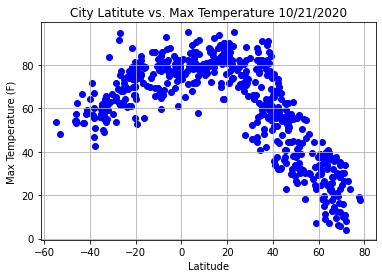

In [14]:
plt.scatter(weather_data['Lat'], weather_data["Max Temp"], color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitute vs. Max Temperature " + cur_date)
plt.grid()
plt.savefig("Lat vs. Max Temp.png")
plt.show()

#The plot below displays the max temperature of a city based on its vertical location on Earth.
#The higher and lower from 0 the latitude is, the lower the max temperature should be.

In [ ]:
plt.scatter(weather_data['Lat'], weather_data["Humidity"], color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitute vs. Humidity " + cur_date)
plt.grid()
plt.savefig("Lat vs. Humidity.png")
plt.show()

#The plot below displays the humidity of a city based on its vertical location on Earth.
#The higher and lower from 0 the latitude is, the lower the humidity should be. 

In [ ]:
plt.scatter(weather_data['Lat'], weather_data["Cloudiness"], color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitute vs. Cloudiness " + cur_date)
plt.grid()
plt.savefig("Lat vs. Cloudiness.png")
plt.show()

#The plot below displays the cloudiness of a city based on its vertical location on Earth.

In [ ]:
plt.scatter(weather_data['Lat'], weather_data["Wind Speed"], color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitute vs. Wind Speed " + cur_date)
plt.grid()
plt.savefig("Lat vs. Wind Speed.png")
plt.show()

#The plot below displays the wind speed of a city based on its vertical location on Earth.

In [ ]:
x_val = weather_data['Lat'].dropna()
y_val = weather_data['Max Temp'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_data['Lat'], weather_data['Max Temp'])

regress_value = weather_data['Max Temp'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

In [ ]:
x_val = weather_data['Lat'].loc[weather_data['Lat'] >= 0]
y_val = weather_data['Max Temp'].loc[weather_data['Lat'] >= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue**2}")


plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] >= 0], weather_data['Max Temp'].loc[weather_data['Lat'] >= 0], color = "blue")
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq,(46,60), fontsize="15", color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitute vs. Max Temp")
plt.savefig("Northern Hemisphere Temp Regression")
plt.show()

#The below plot is showing a trend of decreasing temperatures, the further away from the equator the city is.

In [ ]:
x_val = weather_data['Lat'].loc[weather_data['Lat'] <= 0]
y_val = weather_data['Max Temp'].loc[weather_data['Lat'] <= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue**2}")


plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] <= 0], weather_data['Max Temp'].loc[weather_data['Lat'] <= 0], color = "blue")
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq,(-50,80), fontsize="15", color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitute vs. Max Temp " + cur_date)
plt.savefig("Southern Hemisphere Temp Regression")
plt.show()

#The below plot is showing a trend of increasing temperatures, the closer to the equator the city is.

In [ ]:
x_val = weather_data['Lat'].loc[weather_data['Lat'] >= 0]
y_val = weather_data['Humidity'].loc[weather_data['Lat'] >= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue**2}")


plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] >= 0], weather_data['Humidity'].loc[weather_data['Lat'] >= 0], color = "blue")
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq,(10,20), fontsize="15", color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitute vs. Humidity " + cur_date)
plt.savefig("Northern Hemisphere Humidity Regression")
plt.show()

#The below plot is showing a slight trend of increasing humidity, the further away from the equator the city is.

In [ ]:
x_val = weather_data['Lat'].loc[weather_data['Lat'] <= 0]
y_val = weather_data['Humidity'].loc[weather_data['Lat'] <= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue**2}")


plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] <= 0], weather_data['Humidity'].loc[weather_data['Lat'] <= 0], color = "blue")
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq,(-30,45), fontsize="15", color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitute vs. Humidity" + cur_date)
plt.savefig("Southern Hemisphere Humidity Regression")
plt.show()

#The below plot is showing a slight trend of increasing humidity, the further away from the equator the city is.

In [ ]:
x_val = weather_data['Lat'].loc[weather_data['Lat'] >= 0]
y_val = weather_data['Cloudiness'].loc[weather_data['Lat'] >= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue**2}")


plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] >= 0], weather_data['Cloudiness'].loc[weather_data['Lat'] >= 0], color = "blue")
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq,(10,20), fontsize="15", color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitute vs. Cloudiness " cur_date)
plt.savefig("Northern Hemisphere Cloudiness Regression")
plt.show()

#The below plot is showing a trend of increasing cloudiness, the further away from the equator the city is.

In [ ]:
x_val = weather_data['Lat'].loc[weather_data['Lat'] <= 0]
y_val = weather_data['Cloudiness'].loc[weather_data['Lat'] <= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue**2}")


plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] <= 0], weather_data['Cloudiness'].loc[weather_data['Lat'] <= 0], color = "blue")
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq,(-30,60), fontsize="15", color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitute vs. Cloudiness " + cur_date)
plt.savefig("Southern Hemisphere Cloudiness Regression")
plt.show()

#The below plot is showing a trend of increasing cloudiness, the closer to the equator the city is.

In [ ]:
x_val = weather_data['Lat'].loc[weather_data['Lat'] >= 0]
y_val = weather_data['Wind Speed'].loc[weather_data['Lat'] >= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue**2}")


plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] >= 0], weather_data['Wind Speed'].loc[weather_data['Lat'] >= 0], color = "blue")
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq,(10,20), fontsize="15", color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitute vs. Wind Speed " + cur_date)
plt.savefig("Northern Hemisphere Wind Speed Regression")
plt.show()

#The below plot is showing a slight trend of increasing increasing wind speed, the further from the equator the city is.

In [ ]:
x_val = weather_data['Lat'].loc[weather_data['Lat'] <= 0]
y_val = weather_data['Wind Speed'].loc[weather_data['Lat'] <= 0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue**2}")


plt.scatter(weather_data['Lat'].loc[weather_data['Lat'] <= 0], weather_data['Wind Speed'].loc[weather_data['Lat'] <= 0], color = "blue")
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq,(-30,15), fontsize="15", color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitute vs. Wind Speed " + cur_date)
plt.savefig("Southern Hemisphere Wind Speed Regression")
plt.show()

#The below plot is showing a slight trend of decreasing wind speed, the closer to the equator the city is.